In [1]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn import metrics
from mobilenetv2 import MobileNetV2_DANN

Using TensorFlow backend.


In [2]:
path = '/Users/irashokar/documents/NOvA_2/files/Feb_test_ii/both/'
with open(path + 'history_train_100_both_32_adam_22_02.pkl','rb') as f1:
    history = pkl.load(f1)

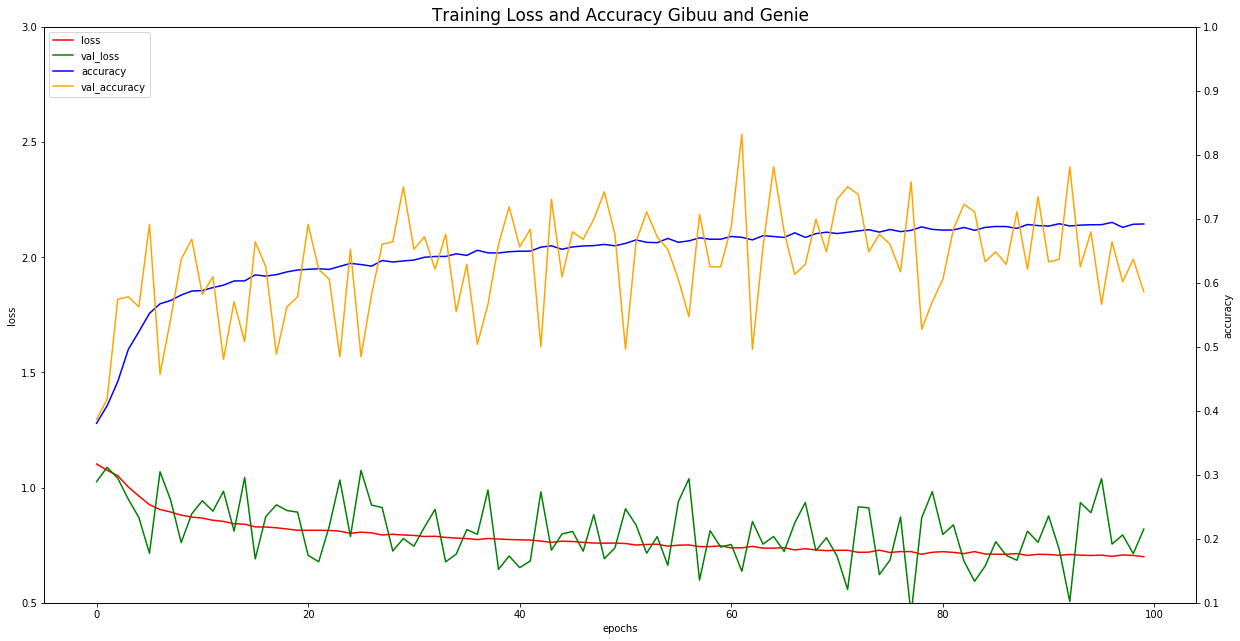

In [3]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx() 


lns1 = ax1.plot(history.history['loss'], color='red', label='loss')
lns2 = ax1.plot(history.history['val_loss'], color='green', label='val_loss')

lns3 = ax2.plot(history.history['accuracy'], color='blue', label='accuracy')
lns4 = ax2.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')


leg = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')
plt.title('', fontsize=20)

plt.rcParams.update({'font.size': 14})

ax1.set_ylim(0.5, 3)
ax1.set_ylabel('loss')

ax2.set_ylim(0.1, 1)
ax2.set_ylabel('accuracy')

ax1.set_xlabel('epochs')
ax1.set_title('Training Loss and Accuracy Gibuu and Genie')

plt.show()


In [4]:
with open(path+ 'test_probabilities_default_TOboth_equal_1__both_32_Adam.pkl','rb') as f2:
    probabilities = pkl.load(f2)
print(len(probabilities))
with open(path+ 'test_labels_default_TOboth_equal_1__both_32_Adam.pkl','rb') as f3:
    test_labels = pkl.load(f3)
print(len(test_labels))
with open(path+ 'test_weights_list_short_default_TOboth_equal_1__both_32_Adam.pkl','rb') as f4:
    gibuu_weights = pkl.load(f4)
with open(path+ 'test_events_default_TOboth_equal_1__both_32_Adam.pkl','rb') as f5:
    events = pkl.load(f5)
with open(path+ 'nodes_values_default_TOboth_equal_1__both_32_Adam.pkl','rb') as f6:
    node_values = pkl.load(f6)

10708
10708


In [5]:
predictions = []
for i in probabilities:
    nc = i[0][0]
    nu_e = i[0][1]
    nu_mu = i[0][2]
    if nc>= nu_e and nc>=nu_mu:
        predictions.append(0)
    elif nu_e>= nc and nu_e>=nu_mu:
        predictions.append(1)
    elif nu_mu>= nu_e and nu_mu>=nc:
        predictions.append(2)
    
test_vals = []
for i in test_labels:
    max_index =np.where(i == np.max(i))[0][0]
    test_vals.append(max_index)
    

#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])

Probabilities: 

Accuracy:0.7021852820321255 

[[0.0173357  0.00259893 0.9800654 ]] 

[[0.0059465  0.00104206 0.9930114 ]] 

[[0.74335223 0.1517519  0.10489594]] 

[[0.88590443 0.07167849 0.04241707]] 

[[0.6720359  0.26374564 0.06421846]] 

[[0.6609946  0.2110682  0.12793723]] 

[[0.11839497 0.8756904  0.00591464]] 

[[0.57125187 0.18818367 0.24056445]] 

[[0.64567053 0.22508933 0.12924021]] 

[[0.5281544  0.3242249  0.14762077]] 

Predictions: 

[2, 2, 0, 0, 0, 0, 1, 0, 0, 0] 

Truth labels: 

[2, 2, 2, 0, 0, 0, 1, 0, 0, 0]


Text(0, 0.5, 'Count')

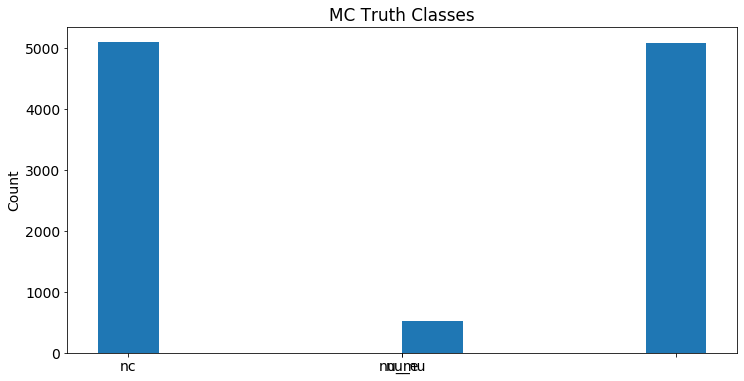

In [6]:
plt.figure(figsize=(12,6))
plt.hist(test_vals)
x = [0.1, 1,1, 1.9]
class_names = ['nc', 'nu_e', 'nu_mu']
plt.xticks(x, class_names)
plt.title('MC Truth Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

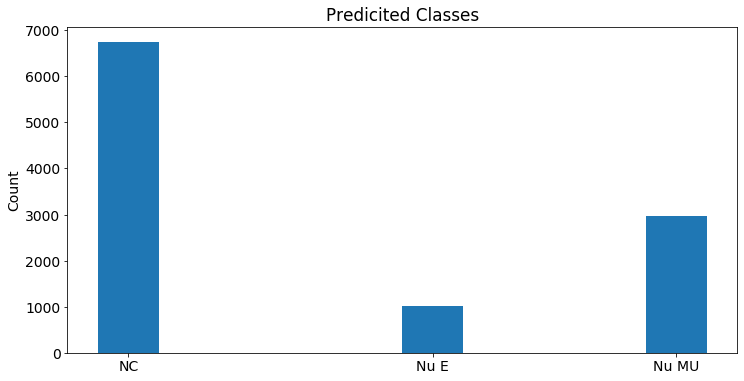

In [7]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')

[(0, 1)]

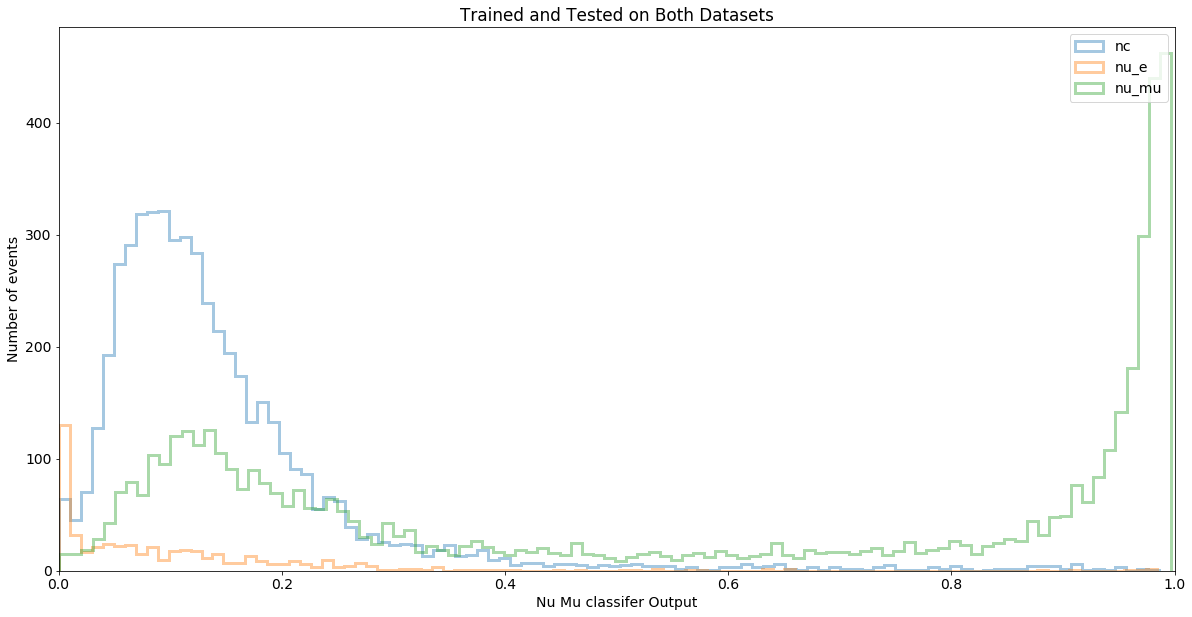

In [8]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0 :
        nc.append(probabilities[i][0][2])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i][0][2])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i][0][2])
        
fig = plt.figure(figsize=(20,10))
g = sns.distplot(nc, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(mu_e, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(nu_mu, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Number of events')
plt.title('Trained and Tested on Both Datasets')
g.set(xlim=(0,1))

[(0, 1)]

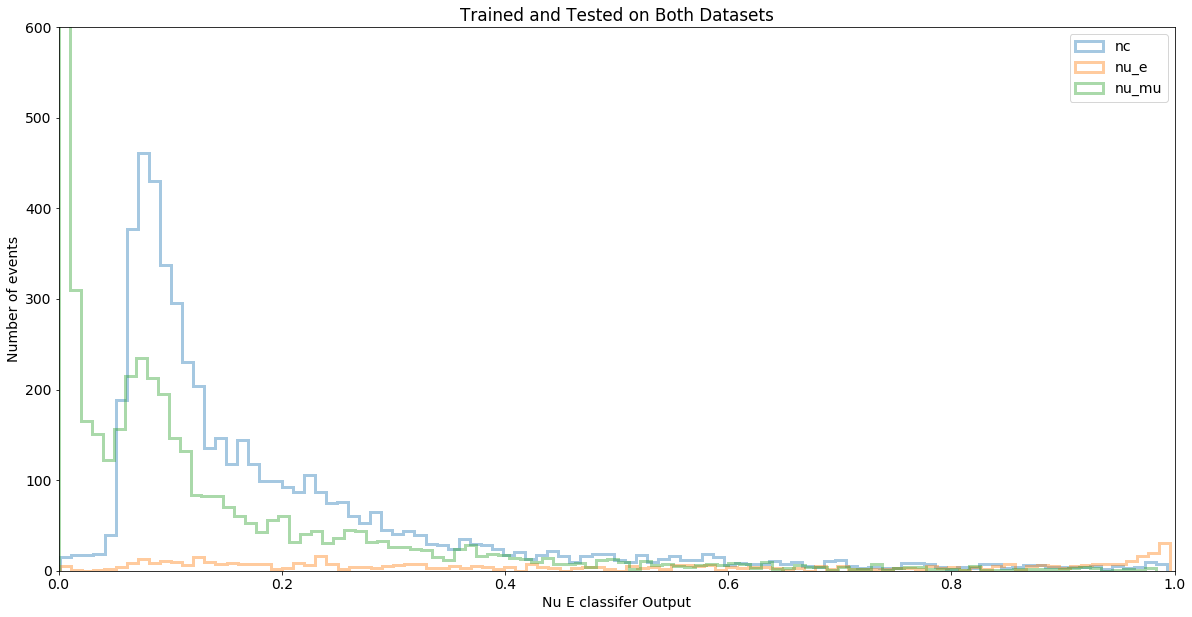

In [9]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i][0][1])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i][0][1])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i][0][1])
        
fig = plt.figure(figsize=(20,10))
g = sns.distplot(nc, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(mu_e, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(nu_mu, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu E classifer Output')
plt.ylabel('Number of events')
plt.title('Trained and Tested on Both Datasets')
g.set(ylim=(0,600))
g.set(xlim=(0,1))

[(0, 1)]

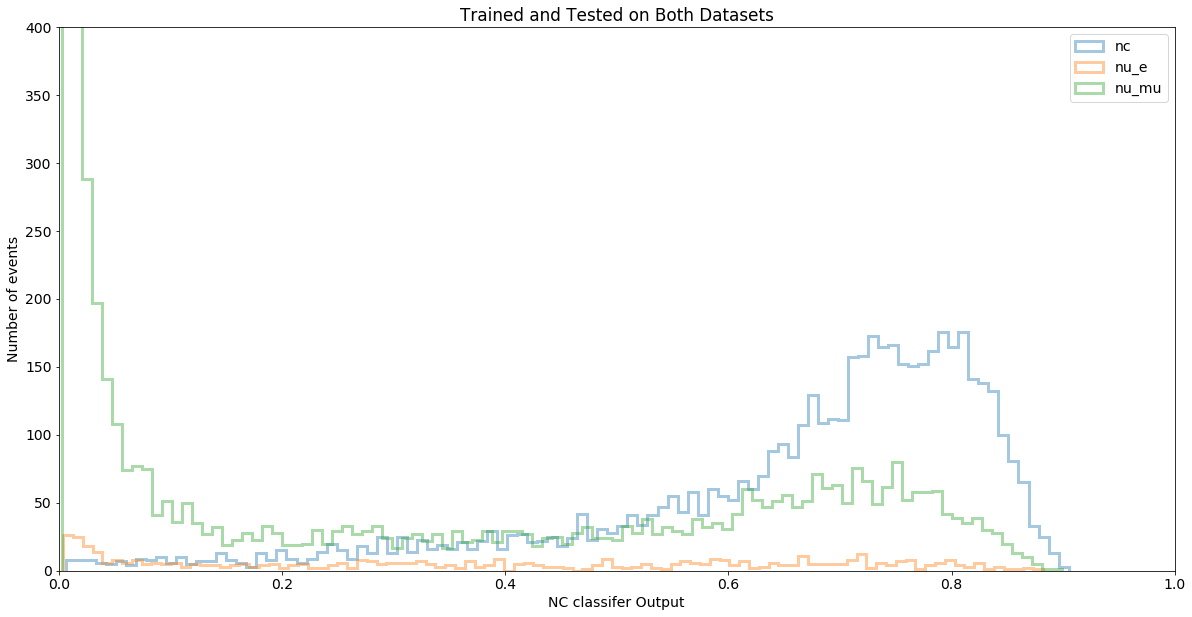

In [10]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i][0][0])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i][0][0])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i][0][0])
        
fig = plt.figure(figsize=(20,10))
g = sns.distplot(nc, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(mu_e, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(nu_mu, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('NC classifer Output')
plt.ylabel('Number of events')
plt.title('Trained and Tested on Both Datasets')
g.set(ylim=(0,400))
g.set(xlim=(0,1))

In [11]:
purity_list = []
efficiency_list = []
p_x_e_list = []

gibuu_weights=[float(i) for i in gibuu_weights]
 
for j in np.arange(0, 0.99, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i][0][2]>=j:
                nu_mu_above.append(probabilities[i][0][2]*gibuu_weights[i])
            elif probabilities[i][0][2]<=j:
                nu_mu_below.append(probabilities[i][0][2]*gibuu_weights[i])
                
        elif test_vals[i] ==0:         
            if probabilities[i][0][2]>=j:
                nc_above.append(probabilities[i][0][2]*gibuu_weights[i])
            elif probabilities[i][0][2]<=j:
                nc_below.append(probabilities[i][0][2]*gibuu_weights[i])
                
        elif test_vals[i] ==1:        
            if probabilities[i][0][2]>=j:
                nu_e_above.append(probabilities[i][0][2]*gibuu_weights[i])
            elif probabilities[i][0][2]<=j:
                nu_e_below.append(probabilities[i][0][2]*gibuu_weights[i])
                
        
                
    purity = len(nu_mu_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_mu_above)/(len(nu_mu_above)+len(nu_mu_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    


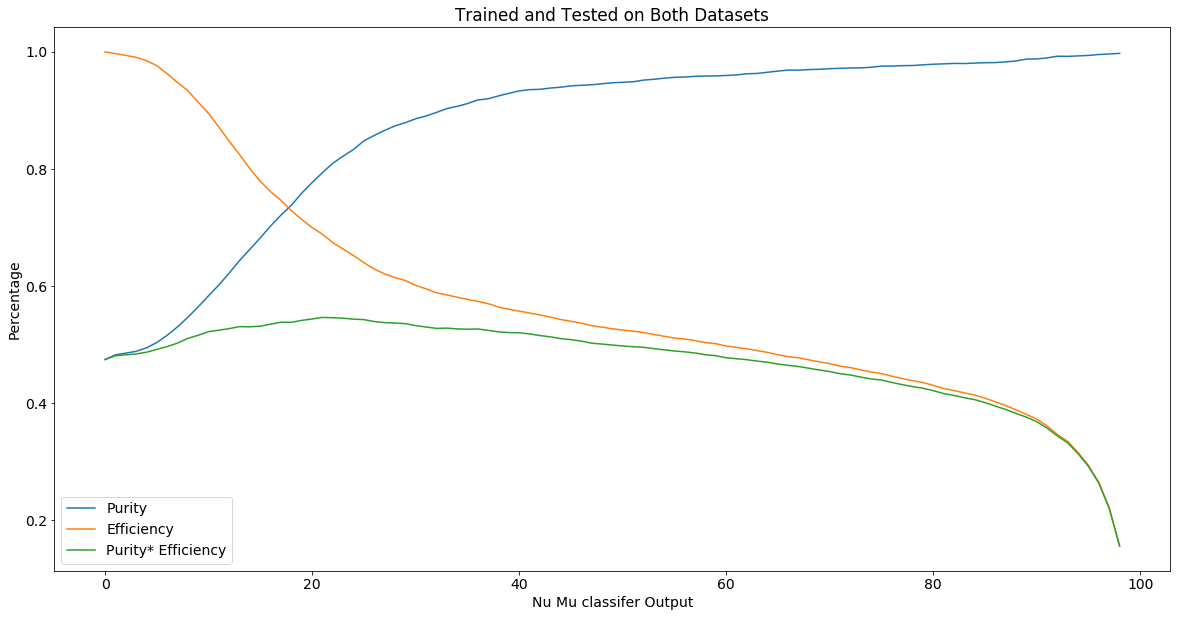

In [12]:
fig = plt.figure(figsize=(20,10))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Percentage')
plt.title('Trained and Tested on Both Datasets')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

In [13]:
purity_list = []
efficiency_list = []
p_x_e_list = []
 
for j in np.arange(0, 0.25, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i][0][1]>=j:
                nu_mu_above.append(probabilities[i][0][1]*gibuu_weights[i])
            elif probabilities[i][0][1]<=j:
                nu_mu_below.append(probabilities[i][0][1]*gibuu_weights[i])
                
        elif test_vals[i] ==0:         
            if probabilities[i][0][1]>=j:
                nc_above.append(probabilities[i][0][1]*gibuu_weights[i])
            elif probabilities[i][0][1]<=j:
                nc_below.append(probabilities[i][0][1]*gibuu_weights[i])
                
        elif test_vals[i] ==1:        
            if probabilities[i][0][1]>=j:
                nu_e_above.append(probabilities[i][0][1]*gibuu_weights[i])
            elif probabilities[i][0][1]<=j:
                nu_e_below.append(probabilities[i][0][1]*gibuu_weights[i])
                
        
                
    purity = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    

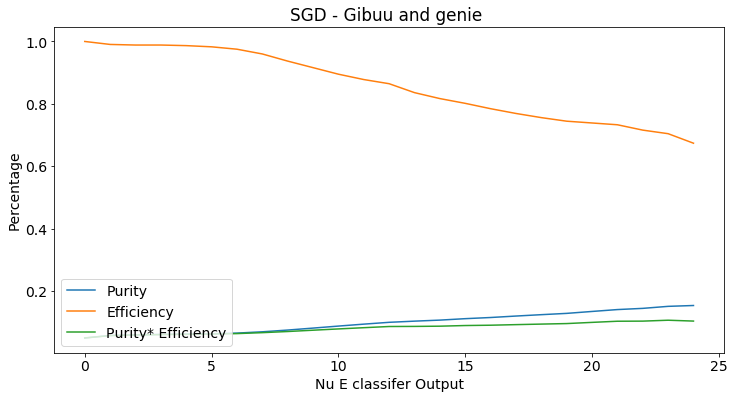

In [14]:
plt.figure(figsize=(12,6))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu E classifer Output')
plt.ylabel('Percentage')
plt.title('SGD - Gibuu and genie ')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

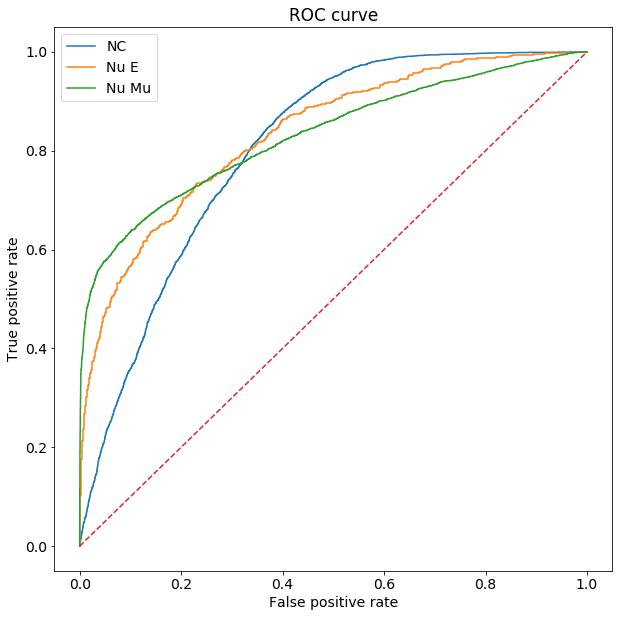

In [15]:
pr_nc = []
pr_nu_e = []
pr_nu_mu = []
for i in range(len(probabilities)):
    pr_nc.append(probabilities[i][0][0])
    pr_nu_e.append(probabilities[i][0][1])
    pr_nu_mu.append(probabilities[i][0][2])

nc_fpr, nc_tpr, nc_thresholds = metrics.roc_curve(test_vals, pr_nc, pos_label=0)
nu_e_fpr, nu_e_tpr, nu_e_thresholds = metrics.roc_curve(test_vals, pr_nu_e, pos_label=1)
nu_mu_fpr, nu_mu_tpr, nu_mu_thresholds = metrics.roc_curve(test_vals, pr_nu_mu, pos_label=2)

plt.figure(figsize=(10,10))
plt.plot(nc_fpr, nc_tpr, label = 'NC')
plt.plot(nu_e_fpr, nu_e_tpr, label = 'Nu E')
plt.plot(nu_mu_fpr, nu_mu_tpr, label = 'Nu Mu')
plt.legend(['NC', 'Nu E', 'Nu Mu',], loc='upper left')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.plot([0,1], [0,1], '--')

In [16]:
def node_event(node):
    bins = 20
    nc_genie = []
    nc_gibuu = []
    nu_e_genie = []
    nu_e_gibuu = []
    nu_mu_genie = []
    nu_mu_gibuu = []
    for i in range(len(events)):
        if test_vals[i] == 0 and events[i][0] == 1:
            nc_genie.append(node_values[i][0][node])
        elif test_vals[i] == 0 and events[i][1]  == 1:
            nc_gibuu.append(node_values[i][0][node])
        elif test_vals[i] == 1 and events[i][0]  == 1:
            nu_e_genie.append(node_values[i][0][node])
        elif test_vals[i] == 1 and events[i][1]  == 1:
            nu_e_gibuu.append(node_values[i][0][node])
        elif test_vals[i] == 2 and events[i][0]  == 1:
            nu_mu_genie.append(node_values[i][0][node])
        elif test_vals[i] == 2 and events[i][1]  == 1:
            nu_mu_gibuu.append(node_values[i][0][node])

    dataset_ = [nc_genie, nc_gibuu, nu_e_genie, nu_e_gibuu, nu_mu_genie, nu_mu_gibuu]
    label = ['nc_genie', 'nc_gibuu', 'nu_e_genie', 'nu_e_gibuu', 'nu_mu_genie', 'nu_mu_gibuu']

    plt.figure(figsize=(20,6))
    (counts, bins) = np.histogram(nc_genie, bins=bins)
    factor = 1/(len(nc_genie))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nc_genie', linestyle=('solid'),color=('g'))
    
    (counts, bins) = np.histogram(nc_gibuu, bins=bins)
    factor = 1/(len(nc_gibuu))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nc_gibuu', linestyle=('dashed'),color=('g'))
    
    (counts, bins) = np.histogram(nu_e_genie, bins=bins)
    factor = 1/(len(nu_e_genie))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nu_e_genie', linestyle=('solid'),color=('r'))
    
    (counts, bins) = np.histogram(nu_e_gibuu, bins=bins)
    factor = 1/(len(nu_e_gibuu))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nu_e_gibuu', linestyle=('dashed'),color=('r'))
    
    (counts, bins) = np.histogram(nu_mu_genie, bins=bins)
    factor = 1/(len(nu_mu_genie))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nu_mu_genie', linestyle=('solid'),color=('b'))
    
    (counts, bins) = np.histogram(nu_mu_gibuu, bins=bins)
    factor = 1/(len(nu_mu_gibuu))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nu_mu_gibuu', linestyle=('dashed'),color=('b'))

    plt.title('Node Number {}'.format(node))
    plt.legend(prop={'size': 10})
    plt.xlabel('Node Value')
    plt.ylabel('Percentage of Data')
    plt.xlim(0.05,1)
    plt.ylim(0,0.2)
    plt.show()

In [17]:
def node_pe(node):
    
    purity_list_mu = []
    efficiency_list_mu = []
    p_x_e_list_mu = []
    
    purity_list_e = []
    efficiency_list_e = []
    p_x_e_list_e = []
    
    purity_list_genie = []
    efficiency_list_genie = []
    p_x_e_list_genie = []
    
    purity_list_gibuu = []
    efficiency_list_gibuu = []
    p_x_e_list_gibuu = []
    
    for j in np.arange(0.1, 0.99, 0.01):
    
        nu_mu_above = []
        nu_mu_below = []
        nc_above = []
        nc_below = []
        nu_e_above = []
        nu_e_below = []
        
        genie_above = []
        genie_below = []
        gibuu_above = []
        gibuu_below = []
        
        for i in range(len(events)-1):
            x = node_values[i][0][node]
            if test_vals[i] ==2:
                if x>=j:
                    nu_mu_above.append(x)
                elif x<=j:
                    nu_mu_below.append(x)

            elif test_vals[i] ==0:         
                if x>=j:
                    nc_above.append(x)
                elif x:
                    nc_below.append(x)

            elif test_vals[i] ==1:        
                if x>=j:
                    nu_e_above.append(x)
                elif x<=j:
                    nu_e_below.append(x)
                    
            if events[i][0] == 1:
                if x>=j:
                    genie_above.append(x)
                elif x<=j:
                    genie_below.append(x)    
         
            elif events[i][1] == 1:
                if x>=j:
                    gibuu_above.append(x)
                elif x<=j:
                    gibuu_below.append(x)  
                            
        try:
            purity_mu = len(nu_mu_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
        except ZeroDivisionError:
            purity_mu = 0
        purity_list_mu.append(purity_mu)
        
        try:
            efficiency_mu = len(nu_mu_above)/(len(nu_mu_above)+len(nu_mu_below))
        except ZeroDivisionError:
            efficiency_mu = 0
        efficiency_list_mu.append(efficiency_mu)
        
        try:
            purity_e = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
        except ZeroDivisionError:
            purity_e = 0
        purity_list_e.append(purity_e)
        
        try:
            efficiency_e = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
        except ZeroDivisionError:
            efficiency_e = 0
        efficiency_list_e.append(efficiency_e)
        
        try:
            purity_genie = len(genie_above)/(len(genie_above)+len(gibuu_above))
        except ZeroDivisionError:
            purity_genie = 0
        purity_list_genie.append(purity_genie)
        
        try:
            efficiency_genie = len(genie_above)/(len(genie_above)+len(genie_below))
        except ZeroDivisionError:
            efficiency_genie = 0
        efficiency_list_genie.append(efficiency_genie)
        
        try:
            purity_gibuu = len(gibuu_above)/(len(genie_above)+len(gibuu_above))
        except ZeroDivisionError:
            purity_gibuu = 0
        purity_list_gibuu.append(purity_gibuu)
        
        try:
            efficiency_gibuu = len(gibuu_above)/(len(genie_above)+len(genie_below))
        except ZeroDivisionError:
            efficiency_gibuu = 0
        efficiency_list_gibuu.append(efficiency_gibuu)
        
        p_x_e_list_mu.append(purity_mu*efficiency_mu)
        p_x_e_list_e.append(purity_e*efficiency_e)
        
        p_x_e_list_genie.append(purity_genie*efficiency_genie)
        p_x_e_list_gibuu.append(purity_gibuu*efficiency_gibuu)

    max_nu_mu, max_nu_e = round(max(p_x_e_list_mu), 3),  round(max(p_x_e_list_e), 3)
    max_genie, max_gibuu = round(max(p_x_e_list_genie), 3),  round(max(p_x_e_list_gibuu), 3)
    if  max_nu_mu!=0 or  max_nu_e !=0 or max_genie!=0 or max_gibuu!=0:
        print('Node {}:     Genie Purity Efficiency: {}, Gibuu: {}     '.format(node, max_genie, max_gibuu), 'Nu Mu classifier: {}, Nu E: {}'.format(max_nu_mu, max_nu_e))
    
    return max(p_x_e_list_mu), max(p_x_e_list_e), max(p_x_e_list_genie), max(p_x_e_list_gibuu)

In [18]:
nu_mu_max, nu_e_max, max_genie, max_gibuu = [], [], [], []
for node, value in enumerate(node_values):
    nu_mu, nu_e, genie, gibuu = node_pe(node)
    nu_mu_max.append(nu_mu)
    nu_e_max.append(nu_e)
    max_genie.append(genie)
    max_gibuu.append(gibuu)
    if node == 1023:
        break

Node 4:     Genie Purity Efficiency: 0.423, Gibuu: 0.26      Nu Mu classifier: 0.184, Nu E: 0.013
Node 9:     Genie Purity Efficiency: 0.086, Gibuu: 0.219      Nu Mu classifier: 0.272, Nu E: 0.137
Node 17:     Genie Purity Efficiency: 0.096, Gibuu: 0.326      Nu Mu classifier: 0.477, Nu E: 0.04
Node 28:     Genie Purity Efficiency: 0.01, Gibuu: 0.209      Nu Mu classifier: 0.323, Nu E: 0.0
Node 33:     Genie Purity Efficiency: 0.246, Gibuu: 0.417      Nu Mu classifier: 0.453, Nu E: 0.003
Node 38:     Genie Purity Efficiency: 0.029, Gibuu: 0.303      Nu Mu classifier: 0.499, Nu E: 0.0
Node 39:     Genie Purity Efficiency: 0.022, Gibuu: 0.276      Nu Mu classifier: 0.455, Nu E: 0.0
Node 43:     Genie Purity Efficiency: 0.002, Gibuu: 0.056      Nu Mu classifier: 0.082, Nu E: 0.0
Node 48:     Genie Purity Efficiency: 0.034, Gibuu: 0.31      Nu Mu classifier: 0.51, Nu E: 0.0
Node 51:     Genie Purity Efficiency: 0.042, Gibuu: 0.292      Nu Mu classifier: 0.471, Nu E: 0.0
Node 52:     Genie 

In [ ]:
interesting_nodes =  [4, 9, 17, 28, 33, 38, 39, 43, 48, 51, 52, 59, 67, 68, 69, 76, 84, 85, 88, 91, 99, 100, 101, 106, 107, 111, 115, 123, 124, 131, 145, 172, 181, 186, 189, 190, 191, 193, 197, 200, 202, 211, 212, 216, 222, 224, 233, 236, 242, 244, 246, 248, 254, 260, 268, 271, 272, 277, 280, 281, 284, 285, 288, 289, 292]
print(len(interesting_nodes)/300)
for i in interesting_nodes:
    node_event(i)

In [20]:
nu_mu_max = [i for i in nu_mu_max]
nu_e_max = [i for i in nu_e_max]
max_genie = [i for i in max_genie]
max_gibuu = [i for i in max_gibuu]

Text(0, 0.5, 'Genie Node activation values purity efficiency curve maximal values')

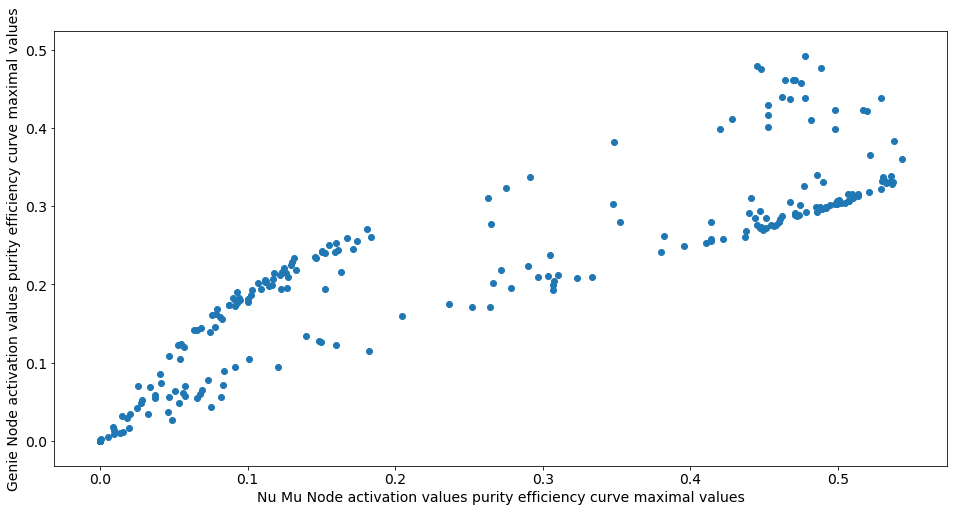

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(nu_mu_max, max_gibuu)
plt.xlabel('Nu Mu Node activation values purity efficiency curve maximal values')
plt.ylabel('Genie Node activation values purity efficiency curve maximal values')

In [ ]:
plt.scatter(nu_mu_max, max_gibuu)

In [ ]:
plt.scatter(nu_e_max, max_genie)